## Compare the 3 outputs

In [1]:
import os, glob, getpass, sys
import warnings

import numpy as np
import itertools
import matplotlib.pyplot as plt
from astropy.table import Table, join, vstack, hstack, Column, MaskedColumn, unique
from astropy.utils.exceptions import AstropyWarning

user = getpass.getuser()
sys.path.append('/Users/' + user + '/Dropbox/my_python_packages')
path = '../'
sys.path.append(path)
from gaia.cluster_comparison_n import Comparison_n as Comparison
from extra_codes import sample_comp as samp_comp

In [2]:
# Path to data ===========
warnings.simplefilter('ignore', AstropyWarning)
path_0    = path + 'sample_control/'
path_1    = path + 'sample_clusters/cl_'
cols      = ['ra', 'dec', 'parallax', 'pmra', 'pmdec', 'source_id']

# Control Data ===========
path_control  = path_0 + 'OPH___control_sample.vot'

# Cluster Data ===========
tabs_dbscan   = glob.glob(path_1 + 'dbscan/cl_dbscan*vot')   ; tabs_dbscan.sort()
tabs_hdbscan  = glob.glob(path_1 + 'hdbscan/cl_hdbscan*vot') ; tabs_hdbscan.sort()
tabs_optics   = glob.glob(path_1 + 'optics/cl_optics*vot')   ; tabs_optics.sort()

In [3]:
# Read Data ==============
label_db = ['mPts = ' + inp[inp.find('mpts')+5:inp.find('.vot')] for inp in tabs_dbscan]
label_op = ['mPts = ' + inp[inp.find('mpts')+5:inp.find('.vot')] for inp in tabs_optics]
label_hd = ['mCls = ' + inp[inp.find('mcls')+5:inp.find('.vot')] for inp in tabs_hdbscan]

# Cosmetics for DBscan label:
for i in range(2):
    label_db[i] = label_db[i].replace('= 0', '= ')
    
    
cl_dbscan_l, cl_optics_l, cl_hdbscan_l  = [],[],[]
for i in range(len(tabs_dbscan)):
    cl_dbscan_l.append (samp_comp.read_cluster(inp_path = tabs_dbscan[i],  label = label_db[i], cols=cols))
    cl_optics_l.append (samp_comp.read_cluster(inp_path = tabs_optics[i],  label = label_op[i], cols=cols))
    cl_hdbscan_l.append(samp_comp.read_cluster(inp_path = tabs_hdbscan[i], label = label_hd[i], cols=cols))

control = samp_comp.read_cluster(inp_path = path_control, label = '', cols=cols)
cl_list = [cl_dbscan_l, cl_optics_l, cl_hdbscan_l]    

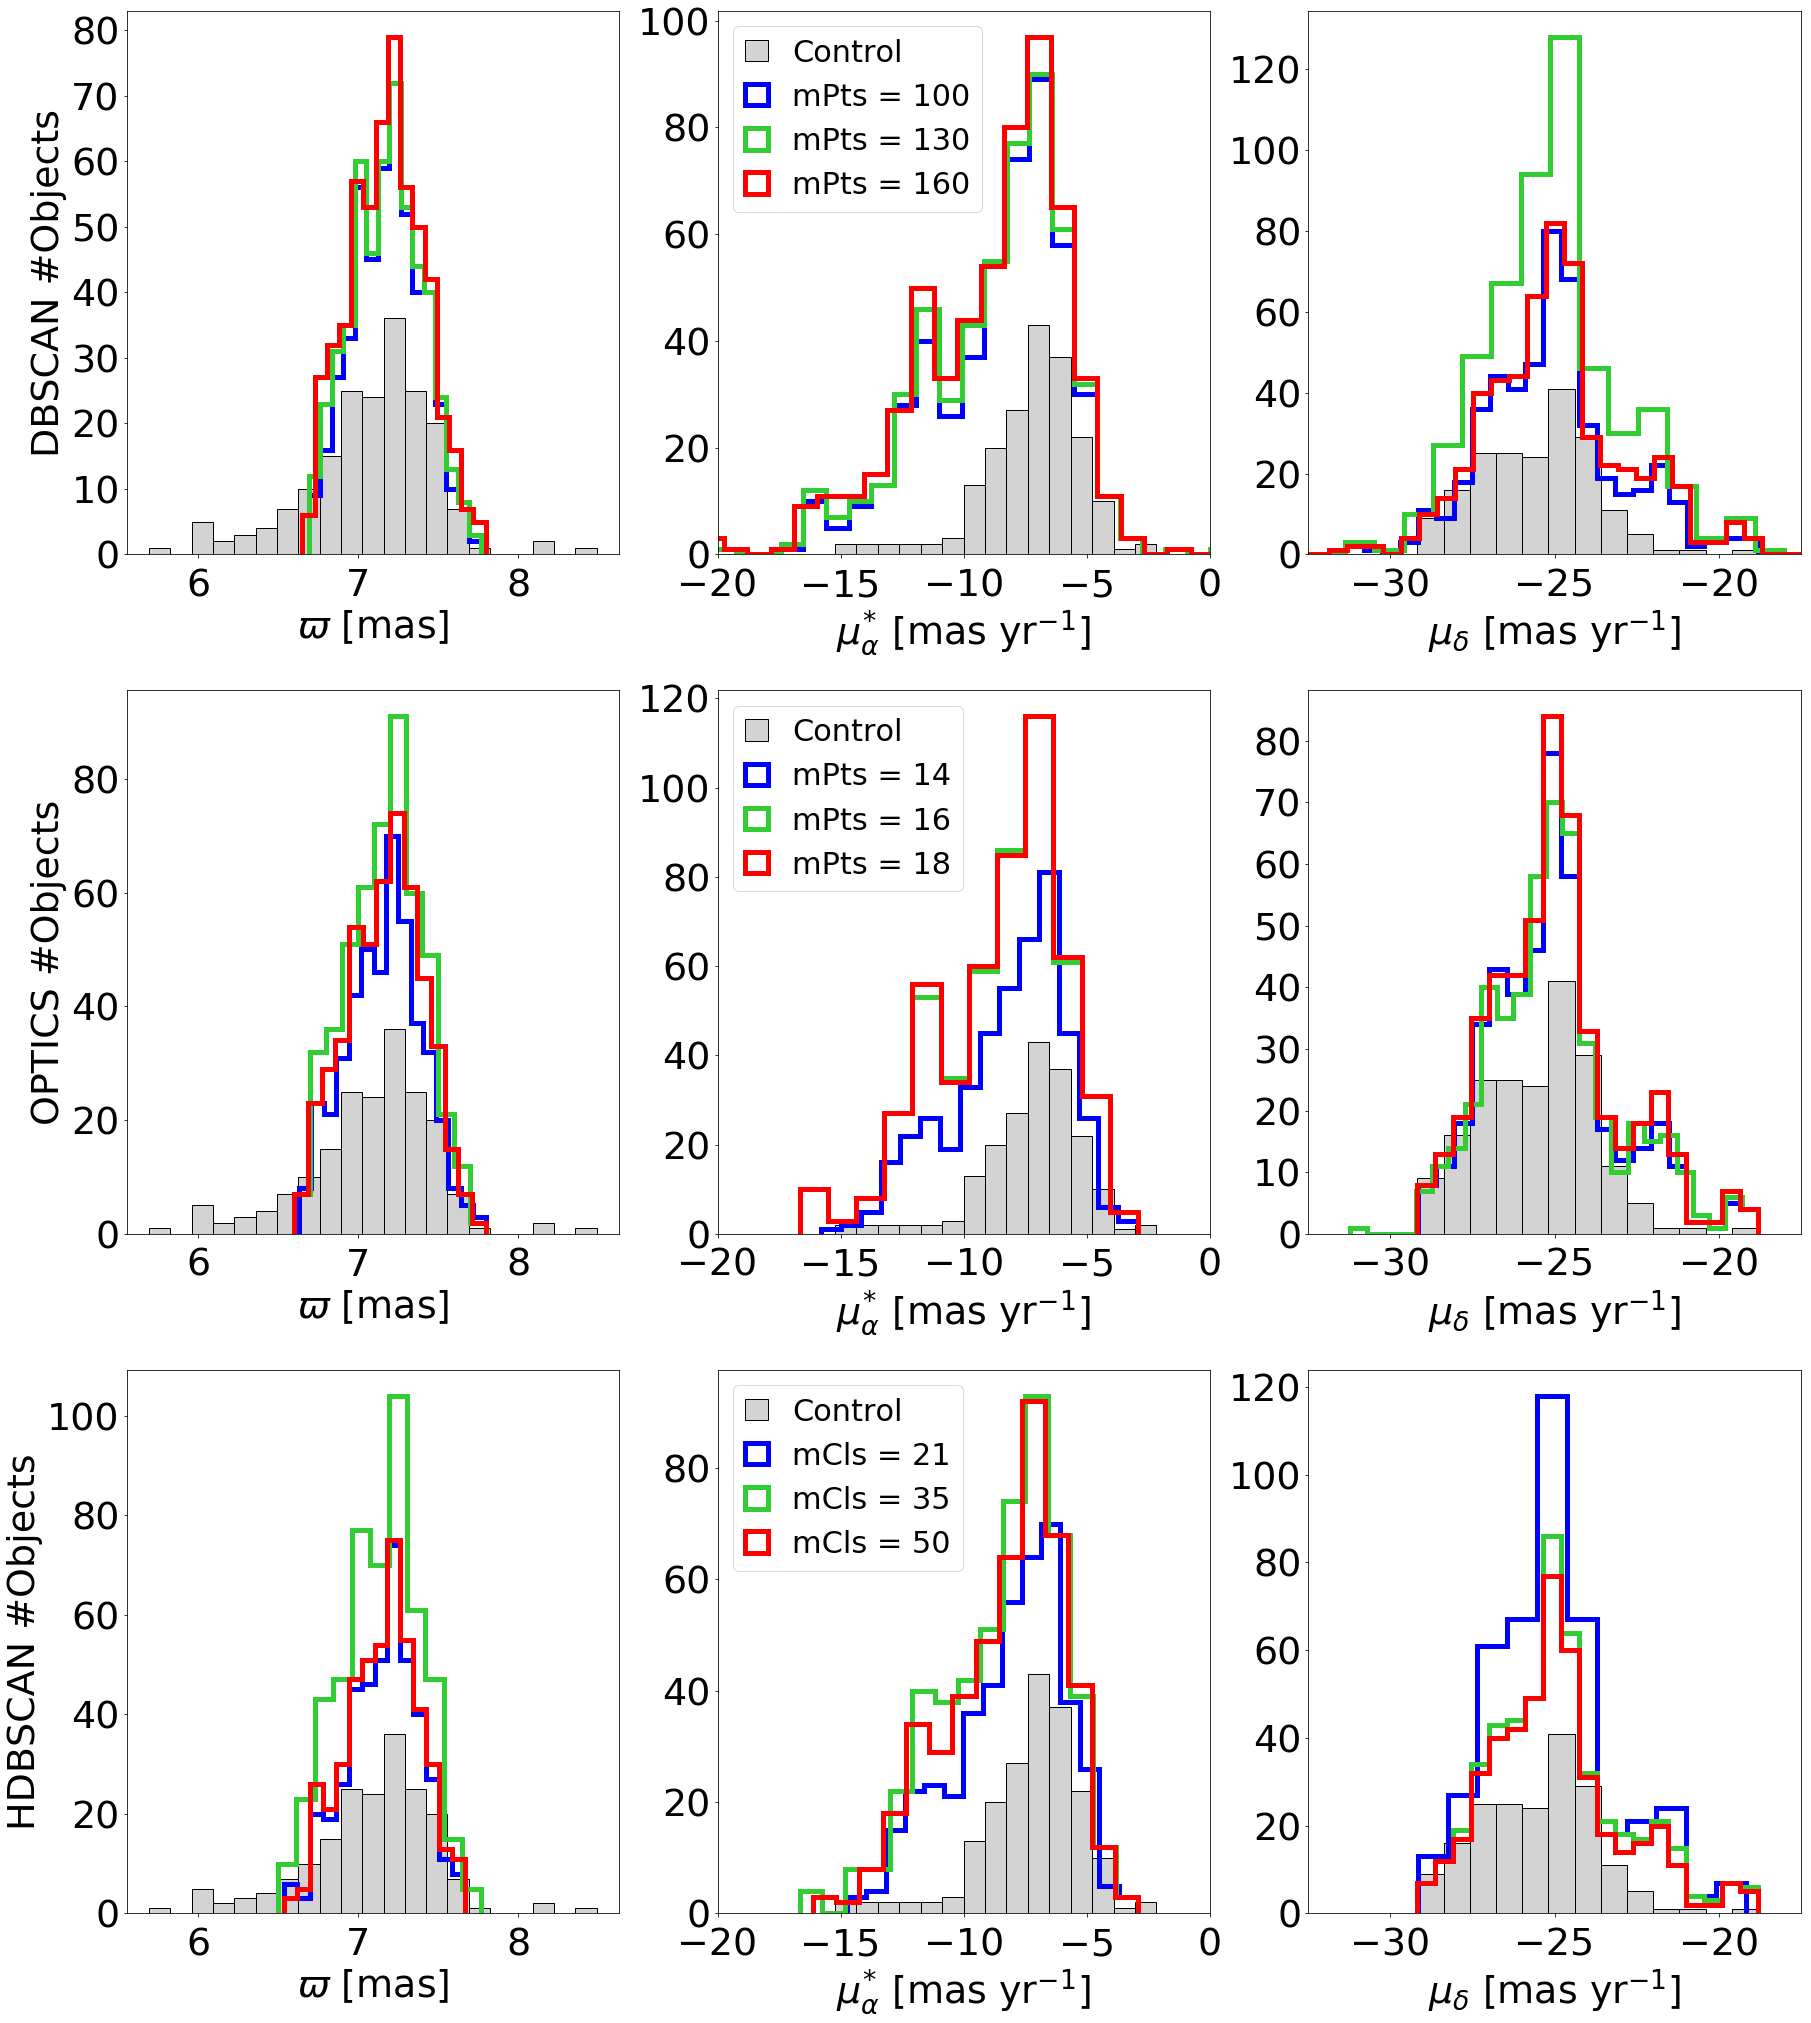

In [4]:
# Make Plot ==============
fig = plt.figure(figsize=[30,35])
plt.subplots_adjust(hspace = 0.25)

colors  = itertools.cycle(["blue", "limegreen", "red"])
pl_idx  = itertools.cycle([[331,332,333], [334,335,336], [337,338,339]])
ylabels = itertools.cycle(['DBSCAN #Objects', 'OPTICS #Objects', 'HDBSCAN #Objects'])
ftsize  = 38
x1lim   = None
x2lim   = [-20,0]
x3lim   = [-32.5,-17.5]

for clusters in cl_list:
    inp_list = Comparison()
    inp_list.load_clusters(control=control, cluster_list=clusters)
    hists = inp_list.plot_3_hist(colors=colors, linewidth=5, fig=False, pl_indexes = next(pl_idx), x1lim=x1lim, x2lim=x2lim, x3lim=x3lim, x1_bins=5, x2_bins=5, x3_bins=5, ftsize=ftsize, ylabel_1=next(ylabels))
    
plt.show()
fig.savefig('01_plot_all_hists.pdf', bbox_inches = 'tight', overwrite = True)